## Load data

In [1]:
%reset -f
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
dirToInclude=parentdir +'/features/'
print dirToInclude
sys.path.insert(0,dirToInclude) 

import IeegConsts
from IeegConsts import *
from IeegFeatures import *

import pandas
import numpy as np
import pandas as pd
from sklearn import cross_validation
from sklearn import metrics
from sklearn.metrics import roc_auc_score, log_loss, roc_auc_score, roc_curve, auc
from sklearn.cross_validation import StratifiedKFold, ShuffleSplit, cross_val_score, train_test_split
import matplotlib.pyplot as plt
import pandas
from scipy.stats import norm, invgamma
from sklearn import linear_model
import numpy as np
import scipy.sparse
import pickle
import xgboost as xgb
import pandas
from scipy.stats import norm, invgamma
from sklearn import linear_model
import numpy as np
import scipy.sparse
import pickle
import xgboost as xgb


currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 
from sklearn.ensemble import RandomForestClassifier
# #http://rcarneva.github.io/understanding-gradient-boosting-part-1.html
from sklearn.ensemble import GradientBoostingClassifier


%matplotlib inline

np.set_printoptions(precision=4, threshold=10000, linewidth=100, edgeitems=999, suppress=True)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 100)
pd.set_option('expand_frame_repr', False)
pd.set_option('precision', 6)
    
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

train_dir=TRAIN_DATA_FOLDER_IN_ALL
test_dir=TEST_DATA_FOLDER_IN_ALL    

ieegFeatures= IeegFeatures(train_dir, True)
df_cols_train=ieegFeatures.ieegGenCols()
print len(df_cols_train)

X_df_train= pd.read_hdf(TRAIN_FEAT_BASE + TRAIN_PREFIX_ALL 
                  + 'X_df_train.hdf', 'data',format='fixed',complib='blosc',complevel=9)

X_df_train_SINGLE=X_df_train.copy(deep=True)

X_df_train_SINGLE.head(3)

/home/shlomo/dev/data-sets/seizure-33/python/features/
Starting:ieegFeatures:2016-10-02 08:39:18.711525
Cols:775
775


,file,id,patient_id,sequence_id,file_size,mean_1,mean_2,mean_3,mean_4,mean_5,mean_6,mean_7,mean_8,mean_9,mean_10,mean_11,mean_12,mean_13,mean_14,mean_15,mean_16,median_1,median_2,median_3,median_4,median_5,median_6,median_7,median_8,median_9,median_10,median_11,median_12,median_13,median_14,median_15,median_16,std_1,std_2,std_3,std_4,std_5,std_6,std_7,std_8,std_9,std_10,std_11,std_12,std_13,std_14,std_15,std_16,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,skew_1,skew_2,skew_3,skew_4,skew_5,skew_6,skew_7,skew_8,skew_9,skew_10,skew_11,skew_12,skew_13,skew_14,skew_15,skew_16,kurt_1,kurt_2,kurt_3,kurt_4,kurt_5,kurt_6,kurt_7,kurt_8,kurt_9,kurt_10,kurt_11,kurt_12,kurt_13,kurt_14,kurt_15,kurt_16,psd_1,psd_2,psd_3,psd_4,psd_5,psd_6,psd_7,psd_8,psd_9,psd_10,psd_11,psd_12,psd_13,psd_14,psd_15,psd_16,psd_17,psd_18,psd_19,psd_20,psd_21,psd_22,psd_23,psd_24,psd_25,psd_26,psd_27,psd_28,psd_29,psd_30,psd_31,psd_32,psd_33,psd_34,psd_35,psd_36,psd_37,psd_38,psd_39,psd_40,psd_41,psd_42,psd_43,psd_44,psd_45,psd_46,psd_47,psd_48,psd_49,psd_50,psd_51,psd_52,psd_53,psd_54,psd_55,psd_56,psd_57,psd_58,psd_59,psd_60,psd_61,psd_62,psd_63,psd_64,psd_65,psd_66,psd_67,psd_68,psd_69,psd_70,psd_71,psd_72,psd_73,psd_74,psd_75,psd_76,psd_77,psd_78,psd_79,psd_80,psd_81,psd_82,psd_83,psd_84,psd_85,psd_86,psd_87,psd_88,psd_89,psd_90,psd_91,psd_92,psd_93,psd_94,psd_95,psd_96,psd_97,psd_98,psd_99,psd_100,psd_101,psd_102,psd_103,psd_104,psd_105,psd_106,psd_107,psd_108,psd_109,psd_110,psd_111,psd_112,psd_113,psd_114,psd_115,psd_116,psd_117,psd_118,psd_119,psd_120,psd_121,psd_122,psd_123,psd_124,psd_125,psd_126,psd_127,psd_128,psd_129,psd_130,psd_131,psd_132,psd_133,psd_134,psd_135,psd_136,psd_137,psd_138,psd_139,psd_140,psd_141,psd_142,psd_143,psd_144,psd_145,psd_146,psd_147,psd_148,psd_149,psd_150,psd_151,psd_152,psd_153,psd_154,psd_155,psd_156,psd_157,psd_158,psd_159,psd_160,result
0,1_548_0.mat,100548,1,91,5980198,-0.031135,-0.050086,0.056264,-0.125906,0.010148,-0.182923,-0.052206,-0.313294,-0.197460,-0.354227,-0.202681,0.123633,0.604957,0.272911,0.401777,0.040232,1.755356,-0.289487,0.721721,1.047945,2.336556,2.122627,0.096654,1.342746,2.780087,6.582189,-4.026581,-8.903570,-10.083026,1.847646,-4.143154,-0.062707,44.370515,51.458254,61.649877,77.645349,57.596783,46.297597,50.104794,42.286228,51.316271,69.608626,85.626431,152.462155,121.430535,88.371428,106.719702,57.031095,1968.742567,2647.951923,3800.707317,6028.800240,3317.389407,2143.467524,2510.490355,1788.125076,2633.359625,4845.360805,7331.885750,23244.708845,14745.374812,7809.509343,11389.094856,3252.545809,-0.299713,0.096344,0.021775,-0.050104,-1.300423,-0.410506,0.123090,-0.345182,-0.401439,-0.540364,0.336145,-0.082761,0.437379,-0.627941,0.388736,-0.034676,0.841001,0.395966,0.683054,0.335079,19.871686,2.602190,1.092800,1.218052,1.013058,0.815220,1.011381,-0.011680,0.370538,2.132940,1.283111,0.510756,-0.272189,-0.199929,-0.087848,0.042947,-0.114184,-0.184363,-0.173677,-0.277009,-0.196882,-0.041190,0.064660,0.343552,0.225719,0.065881,0.179124,-0.104978,-0.506884,-0.477970,-0.320645,-0.361598,-0.406886,-0.499819,-0.445538,-0.446068,-0.328822,-0.318394,-0.266228,-0.064492,-0.150492,-0.295206,-0.199955,-0.422967,-0.642712,-0.727159,-0.651135,-0.695977,-0.585187,-0.781210,-0.653631,-0.745715,-0.495869,-0.545594,-0.584595,-0.531246,-0.352830,-0.525037,-0.433949,-0.734919,-0.885500,-0.907595,-0.811387,-0.843703,-0.664076,-0.931196,-0.784457,-0.885559,-0.778022,-0.671714,-0.690572,-0.758339,-0.521721,-0.667978,-0.555919,-0.914439,-0.781728,-1.000955,-0.998004,-1.069638,-0.757692,-1.139565,-1.032770,-1.096978,-0.881422,-0.844298,-0.847824,-1.050634,-0.762020,-0.805956,-0.827576,-1.183613,-0.968680,-1.110826,-1.038238,-1.345468,-0.868496,-1.340362,-1.370000,-1.386095,-1.258666,-1.003359,-1.048696,-1.307013,-1.024427,-1.015353,-1.130445,-1.428054,0.593032,0.852496,0.929807,1.228960,0.695386,1.044098,0.995766,0.940901,0.833427,0.875397,1.001409,1.503726,1.09941

## Feature selection

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.5,
       gamma=0.017, learning_rate=0.15, max_delta_step=0, max_depth=12,
       min_child_weight=3, missing=None, n_estimators=2000, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=1, subsample=0.8)
Running:XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.5,
       gamma=0.017, learning_rate=0.15, max_delta_step=0, max_depth=12,
       min_child_weight=3, missing=None, n_estimators=2000, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=1, subsample=0.8)shape:(5971, 768)
ROC AUC:0.788733252626
LOG LOSS:0.292151095819


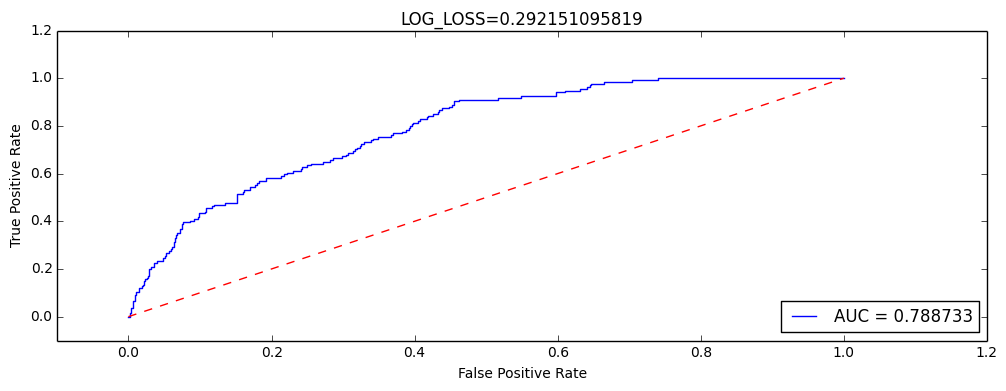

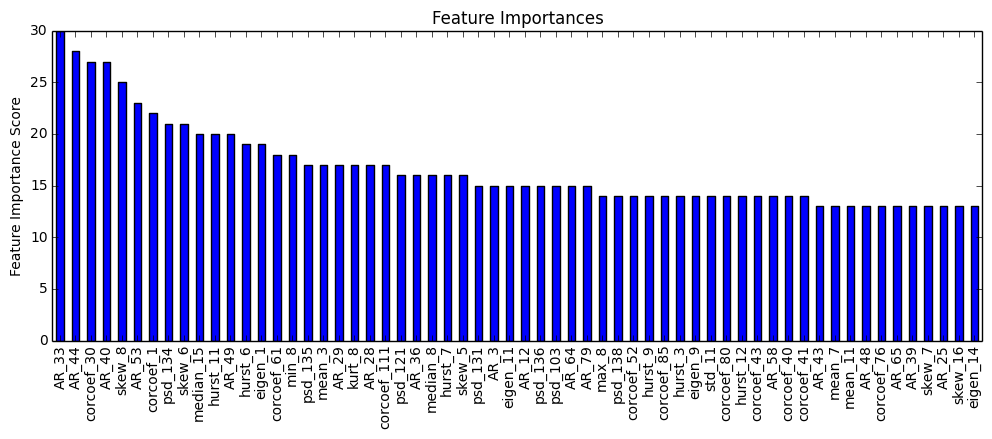

In [32]:
mx_depth=9

algo_xgbm = xgb.XGBClassifier(base_score=0.5, colsample_bytree=0.5, 
                               gamma=0.017,learning_rate=0.15, max_delta_step=0, 
                               max_depth=mx_depth, min_child_weight=3, n_estimators=3000, 
                               nthread=-1, objective='binary:logistic', seed=0, 
                               silent=1, subsample=0.8, eta=0.3)

algo_=algo_xgbm
print algo_

X_df_train= pd.read_hdf(TRAIN_FEAT_BASE + TRAIN_PREFIX_ALL 
                  + 'X_df_train.hdf', 'data',format='fixed',complib='blosc',complevel=9)

X_df_train_SINGLE=X_df_train.copy(deep=True)

answers_1_SINGLE = list (X_df_train_SINGLE[singleResponseVariable].values)
X_df_train_SINGLE = X_df_train_SINGLE.drop(singleResponseVariable, axis=1)
X_df_train_SINGLE.drop('id', axis=1, inplace=True)
X_df_train_SINGLE.drop('file', axis=1, inplace=True)
X_df_train_SINGLE.drop('patient_id', axis=1, inplace=True)
X_df_train_SINGLE.drop('file_size', axis=1, inplace=True)
X_df_train_SINGLE.drop('sequence_id', axis=1, inplace=True)
X_df_train_SINGLE.drop('segment', axis=1, inplace=True)

X_df_train_SINGLE=X_df_train_SINGLE.apply(lambda x: pandas.to_numeric(x, errors='ignore'))

print 'Running:' + str(algo_) + 'shape:' + str(X_df_train_SINGLE.shape)
trainX, testX, trainY, testY = train_test_split(X_df_train_SINGLE, answers_1_SINGLE, test_size=.33)  # CV
model_train = algo_.fit(trainX, trainY, early_stopping_rounds=100,eval_metric="auc", eval_set=[(testX, testY)], 
                            verbose=False)
# print model_train
predictions = algo_.predict_proba(testX)[:, 1]

print 'ROC AUC:' + str(roc_auc_score(testY, predictions))
print 'LOG LOSS:' + str(log_loss(testY, predictions))
false_positive_rate, true_positive_rate, thresholds = roc_curve(testY, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('LOG_LOSS=' + str(log_loss(testY, predictions)))
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.6f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.1, 1.2])
plt.ylim([-0.1, 1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


feat_imp = pd.Series(algo_.booster().get_fscore()).sort_values(ascending=False)
feat_imp= feat_imp.head(60) # display only 60
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')
# plt.yscale('log')

# print feat_imp

# Build pasty expression -- feed best features automatically 
glm_factor = pd.Series(algo_.booster().get_fscore()).sort_values(ascending=False)
glm_factor= glm_factor.head(350)
glm_factor=list(glm_factor.index)

## All patients as one - prediction

Using grid
Limit on the number of features
{'penalty': ['l2'], 'C': [1, 5, 10, 20, 50, 200, 300, 500], 'fit_intercept': [False, True], 'solver': ['newton-cg', 'lbfgs']}
Running:GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l2'], 'C': [1, 5, 10, 20, 50, 200, 300, 500], 'fit_intercept': [False, True], 'solver': ['newton-cg', 'lbfgs']},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc',
       verbose=False),shape:(5971, 350)
{'penalty': 'l2', 'C': 500, 'solver': 'newton-cg', 'fit_intercept': True}
0.741051350107
Running:LogisticRegression(C=500, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_

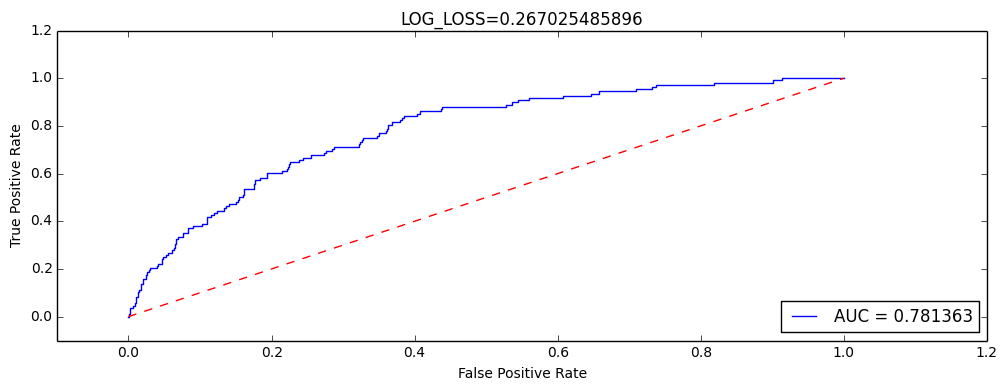

In [33]:
#glm_factor= ieegFeatures.bestFeaturesXGB(X_df_train, howManyFeatures=300)
X_df_train= pd.read_hdf(TRAIN_FEAT_BASE + TRAIN_PREFIX_ALL 
                  + 'X_df_train.hdf', 'data',format='fixed',complib='blosc',complevel=9)

X_df_train_SINGLE=X_df_train.copy(deep=True)
X_df_train_SINGLE.drop('id', axis=1, inplace=True)
X_df_train_SINGLE.drop('file', axis=1, inplace=True)
X_df_train_SINGLE.drop('patient_id', axis=1, inplace=True)
X_df_train_SINGLE.drop('file_size', axis=1, inplace=True)
X_df_train_SINGLE.drop('sequence_id', axis=1, inplace=True)
X_df_train_SINGLE.drop('segment', axis=1, inplace=True)

X_df_train_FNAMES=X_df_train.copy(deep=True)
X_df_train_FNAMES.drop('id', axis=1, inplace=True)
X_df_train_FNAMES.drop('file', axis=1, inplace=True)
X_df_train_FNAMES.drop('patient_id', axis=1, inplace=True)
X_df_train_FNAMES.drop('file_size', axis=1, inplace=True)
X_df_train_FNAMES.drop('sequence_id', axis=1, inplace=True)
X_df_train_FNAMES.drop('segment', axis=1, inplace=True)
X_df_train_FNAMES.drop(singleResponseVariable, axis=1, inplace=True)

# X_df_train_FNAMES.head(3)
# X_df_train_SINGLE=X_df_train_SINGLE.apply(lambda x: pandas.to_numeric(x, errors='ignore'))

# glm_factor=list([0, 1, 2, 643, 4, 645, 646, 7, 9, 138, 12, 529, 3, 22, 663, 25, 667, 670, 5, 676, 6, 550, 296, 684, 46, 304, 49, 50, 53, 311, 56, 314, 315, 700, 62, 63, 705, 453, 744, 89, 339, 85, 36, 608, 97, 611, 102, 614, 615, 232, 617, 107, 110, 112, 616, 467, 629, 630, 119, 121])

# X_df_train_FNAMES=X_df_train_FNAMES.iloc[:,glm_factor] # Thorw away
# X_df_train_FNAMES.head(3)
# glm_factor=X_df_train_FNAMES.columns.values # only need this
# glm_factor
# # X_df_train_FNAMES=None

glm_factor=None
withGrid=False
trainX, testX, trainY, testY, algo_, roc_auc= ieegFeatures.singlePatientLRModel(X_df_train_SINGLE,
                                                                                glm_factor=glm_factor,
                                                                                withGrid=withGrid)

# {'penalty': 'l2', 'C': 500, 'solver': 'newton-cg', 'fit_intercept': True}
# 0.750860887784

## All patients as one submission

In [34]:
ieegFeatures= IeegFeatures(test_dir, False)
df_cols_test=ieegFeatures.ieegGenCols()
print len(df_cols_test)
F_NAME_TEST= TEST_FEAT_BASE + TEST_PREFIX_ALL +'-feat_TEST_df.csv'
X_df_TEST=pandas.read_csv(F_NAME_TEST, engine='python') 
X_df_TEST.drop('Unnamed: 0', axis=1, inplace=True)
# X_df_TEST.drop('id', axis=1, inplace=True)
X_df_TEST.drop('file', axis=1, inplace=True)
X_df_TEST.drop('patient_id', axis=1, inplace=True)
# X_df_TEST.drop('file_size', axis=1, inplace=True)
# X_df_TEST.drop('sequence_id', axis=1, inplace=True)
#Select only best features
# glm_factor.append('id')
# X_df_TEST=X_df_TEST[glm_factor] # This line removed the id ...
X_df_TEST.head(3)

#------------------------------------------------------------------------------#
now = datetime.now()
import dis

fld='submission/' + str(datetime.now().strftime("%Y-%m-%d-%H-%M-%S")) +'/'

if not os.path.exists(fld):
    os.makedirs(fld)

#Store LR coeefs
lr_coeefs=algo_.coef_
lr_intercept=algo_.intercept_
# print lr_coeefs
# print lr_intercept

from sklearn.externals import joblib
# # Coeefs
ml_coffes_file=fld + 'mlb_stats-' + str(roc_auc) + '.pkl'
joblib.dump(algo_.coef_,ml_coffes_file, compress=9) 
# #Intercept
ml_intercept_file=fld + 'mlb_intercept-' + str(roc_auc) + '.pkl'
joblib.dump(algo_.intercept_,ml_intercept_file, compress=9) 

#Coeef names
glm_factor2_file=fld + 'glm_factor2-' + str(roc_auc) + '.pkl'
joblib.dump(glm_factor,glm_factor2_file, compress=9) 



sub_file = fld + 'submission_ONE_' + str(roc_auc) + '_' +'grid_' + withGrid + '_' +(str(algo_))[0:12] 
+ '_'  + str(len(glm_factor))  +'_feat_' + '.csv'
r= pandas.DataFrame.from_csv('sample_submission.csv')
print('Writing submission: ', sub_file)
f = open(sub_file, 'w') # append mode
f.write('File,Class\n')

total = 0
for index, row in r.iterrows():            
    id_str= index     
    arr = id_str.split("_")
    patient = int(arr[0])        
    new_id= ieegFeatures.getIdFromFileName(id_str) 
#     print str(new_id)
    
    X_df_single_row=X_df_TEST.loc[X_df_TEST['id'] == new_id]
#         print X_df_single_row
    X_df_single_row.drop('id', axis=1, inplace=True)
    X_df_single_row=X_df_single_row[glm_factor]
#     X_df_single_row.drop('file', axis=1, inplace=True)
#     X_df_single_row.drop('patient_id', axis=1, inplace=True)        

    pred_X_df_single_row= algo_.predict_proba(X_df_single_row)    
    c_pred=pred_X_df_single_row[:, 1] # is the probability of the label being 1 
#         print c_pred
    str1 = id_str + ',' + str(c_pred[0]) + '\n'                
    
    f.write(str1)
    
f.close()

print('Done writing submission: ', sub_file)
#for idx, row in X_df_train_1_fnames.iteritems():        
#------------------------------------------------------------------------------#

Starting:ieegFeatures:2016-10-01 18:28:12.479662
Cols:771
771
('Writing submission: ', 'submission/2016-10-01-18-28-16/submission_ONE_0.781363245501_LogisticRegr_350_feat_.csv')
('Done writing submission: ', 'submission/2016-10-01-18-28-16/submission_ONE_0.781363245501_LogisticRegr_350_feat_.csv')
